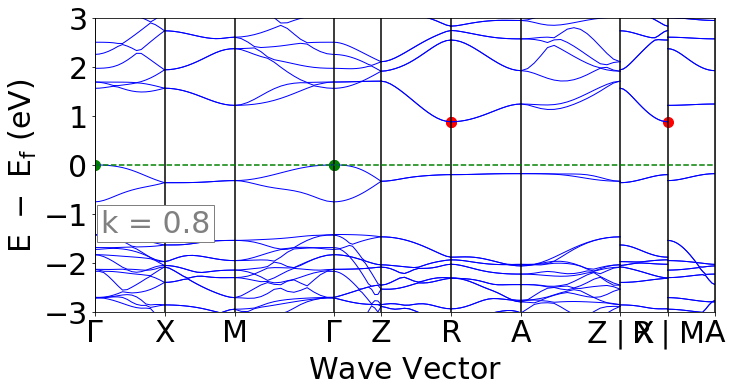

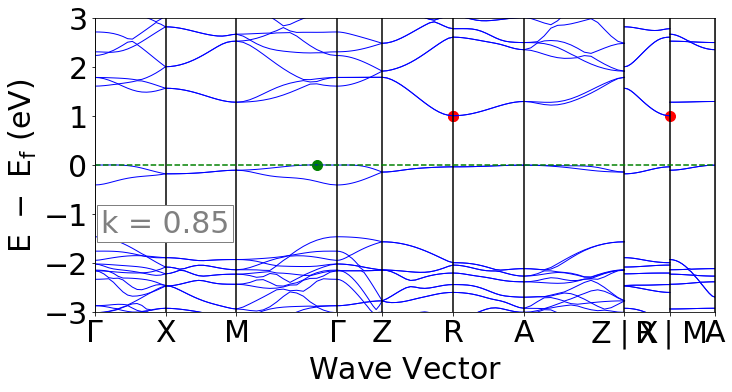

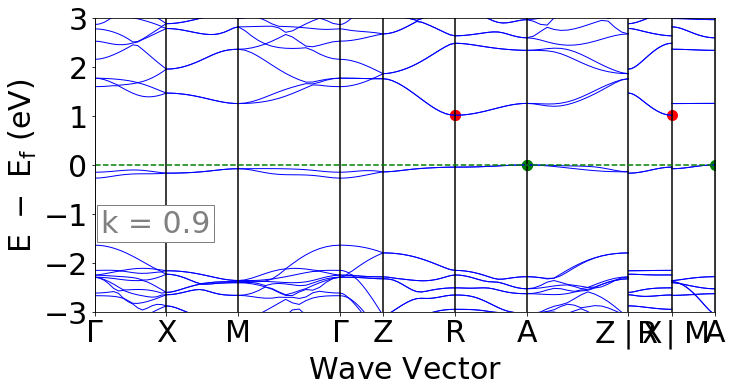

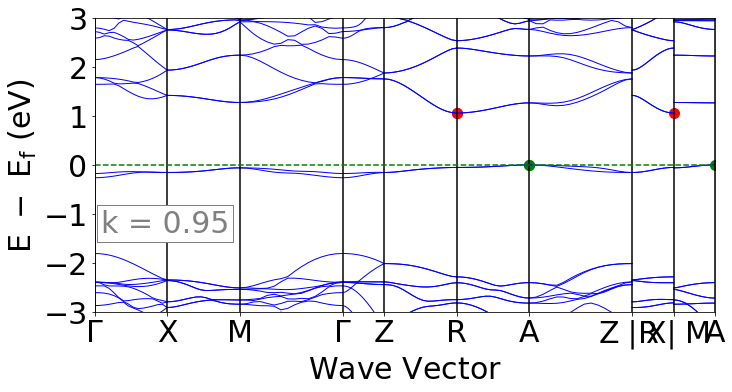

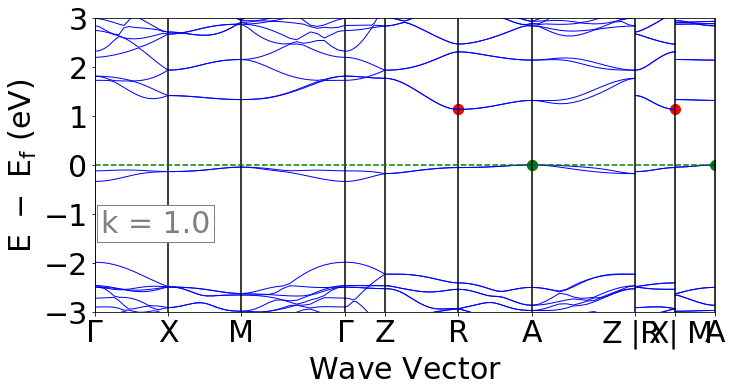

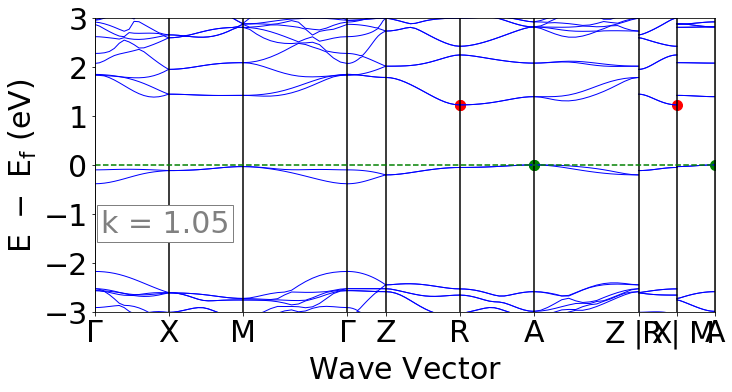

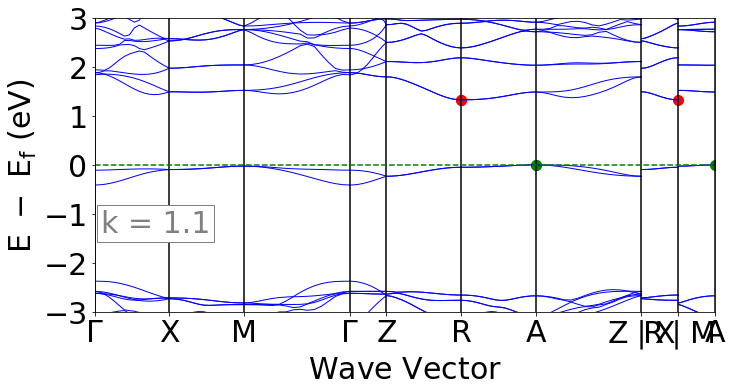

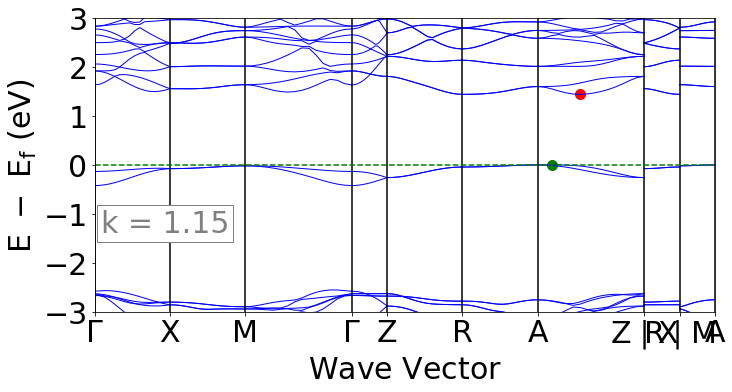

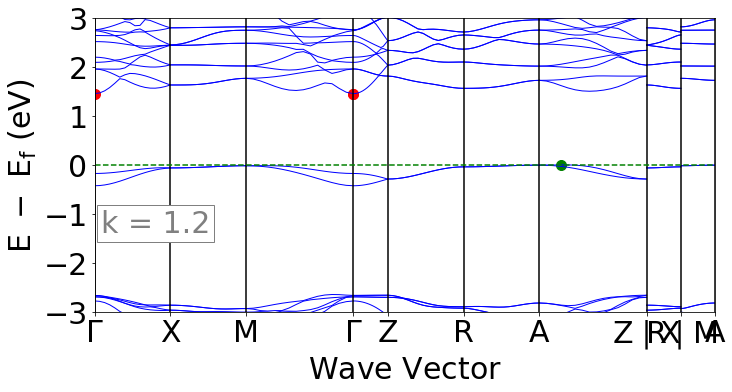

In [11]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np

ITERS_1 = [0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2]
DOPING_LABELS = [f"k = {str(i)}" for i in ITERS_1]
YLIMS = [[-3, 3]]*10
FIG_SIZE = [10, 5]

bands = []

for i, suffix in enumerate(ITERS_1):
    v = BSVasprun(f"../../../vary-axial-ratio/d1/elec_bands/vasprun-{suffix}.xml")
    bs = v.get_band_structure(kpoints_filename="KPOINTS",line_mode=True)
    plt = BSPlotter(bs)
    plot = plt.get_plot(vbm_cbm_marker=True,ylim=YLIMS[i])
    plot.axhline(y=0, linestyle = '--', color='green')
    fig = plot.gcf()
    fig.set_size_inches(FIG_SIZE)    #plt.bs_plot_data(zero_to_efermi=True)
    t = plot.text(0.01, 0.25, f"{DOPING_LABELS[i]}", horizontalalignment='left', verticalalignment='bottom',\
         transform=plot.gca().transAxes, fontsize=30, color='grey')
    t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='grey'))
#     plt.show()
    bands.append(bs)
#     bands.update({suffix:bs})
    plot.savefig(f"elec_bands-vec-{suffix}.pdf", img_format='pdf', bbox_inches='tight')
    plot.savefig(f"elec_bands-{suffix}.png", img_format='png', bbox_inches='tight')

/home/kdmiller/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fe38d85b1d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


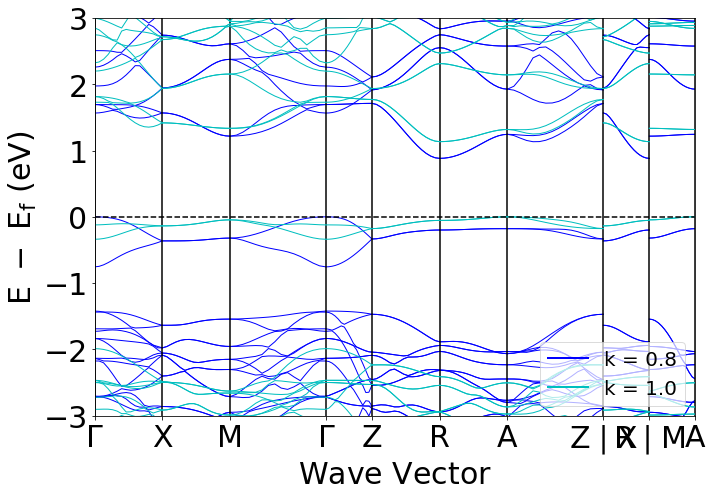

In [13]:
### Plotting some comparisons

# Indices at which we compare band structures
i1 = 0
i2 = 4
FIG_SIZE = [10, 7]

p1 = BSPlotter(bands[i1])
p2 = BSPlotter(bands[i2])
band_plot = p1.plot_compare(p2)

### Formatting
fig = band_plot.gcf()
band_plot.ylim(YLIMS[i])


band_plot.plot([0,10],[0,0],'k--')
# band_plot.text(0.6, 0.3, DOPING_LABELS[i], horizontalalignment='right', verticalalignment='bottom',\
#      transform=band_plot.gca().transAxes, fontsize=40, color='grey')

import matplotlib.lines as mlines
handles = [mlines.Line2D([], [], linewidth=2,
                                 color='b', label=DOPING_LABELS[i1]),
                   mlines.Line2D([], [], linewidth=2,
                                 color='w', label='_nolegend_',
                                 linestyle="--"),
                   mlines.Line2D([], [], linewidth=2,
                                 color='c', label=DOPING_LABELS[i2])]
band_plot.legend(handles = handles, fontsize=20, loc='lower right',framealpha=0.7)

### Showing and saving
fig.set_size_inches(1FIG_SIZE)    #plt.bs_plot_data(zero_to_efermi=True)
band_plot.tight_layout() #prevents edges from being cut off
fig.savefig(f'band-comp-{suffix}.png',dpi=400)
fig.savefig(f'band-comp-vec-{suffix}.pdf')

In [ ]:
### Plotting some comparisons

p1 = BSPlotter(bands[0.8])
p2 = BSPlotter(bands[1])
band_plot = p1.plot_compare(p2)

### Formatting
fig = band_plot.gcf()
band_plot.ylim(YLIMS[i])


band_plot.plot([0,10],[0,0],'k--')
# band_plot.text(0.6, 0.3, DOPING_LABELS[i], horizontalalignment='right', verticalalignment='bottom',\
#      transform=band_plot.gca().transAxes, fontsize=40, color='grey')

import matplotlib.lines as mlines
handles = [mlines.Line2D([], [], linewidth=2,
                                 color='b', label='disp = 0 $\AA$'),
                   mlines.Line2D([], [], linewidth=2,
                                 color='w', label='_nolegend_',
                                 linestyle="--"),
                   mlines.Line2D([], [], linewidth=2,
                                 color='c', label='disp = 0.2 $\AA$')]
band_plot.legend(handles = handles, fontsize=20, loc='center right',framealpha=0.3)

### Showing and saving
fig.set_size_inches(10, 7)    #plt.bs_plot_data(zero_to_efermi=True)
band_plot.tight_layout() #prevents edges from being cut off
fig.savefig(f'band-comp-{suffix}.png',dpi=400)
#     fig.savefig(f'band-comp-vec-{suffix}.pdf')